Import Library

In [1]:
%pip install pandas
%pip install nltk
%pip install numpy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import string
import nltk
import ast
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re
import numpy as np

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\resta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\resta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\resta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Load Dataset

In [3]:
data = pd.read_csv('stories_history.csv')

# Identify and drop rows containing the word "tidak" in any relevant column
columns_to_check = ['title', 'storylink', 'article']
data_cleaned = data[
    ~data[columns_to_check].apply(lambda x: x.str.contains(r'\btidak\b', case=False, na=False)).any(axis=1)
]

# Save the cleaned dataset
data_cleaned.to_csv('cleaned_stories_history.csv', index=False)


##Data Pre-processing

In [4]:
punc = string.punctuation
stopw = set(stopwords.words('english'))

def remove_number(text):
    return re.sub(r'\d+', '', text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punc))

def remove_stopwords(text):
    return " ".join ([word for word in str(text).split() if word not in stopw])

def remove_single_quotes(text):
    return re.sub(r"[‘’']", "", text)

data["title_low"] = data["title"].str.lower()
data["title_wo_number"] = data["title_low"].apply(lambda text: remove_punctuation(text))
data["title_wo_punct"] = data["title_wo_number"].apply(lambda text: remove_number(text))
data["title_wo_stopwords"] = data["title_wo_punct"].apply(lambda text: remove_stopwords(text))
data["title clean"] = data["title_wo_stopwords"].astype(str).apply(lambda text: remove_single_quotes(text))

data

,title,storylink,article,title_low,title_wo_number,title_wo_punct,title_wo_stopwords,title clean
0,Who Was the Mysterious Hijacker D.B. Cooper?,/news/who-was-d-b-cooper,It's the only unsolved hijacking case in the h...,who was the mysterious hijacker d.b. cooper?,who was the mysterious hijacker db cooper,who was the mysterious hijacker db cooper,mysterious hijacker db cooper,mysterious hijacker db cooper
1,How Americans Started Clipping Coupons,/news/coupons-united-states-great-depression,Americans love a good deal and coupons have lo...,how americans started clipping coupons,how americans started clipping coupons,how americans started clipping coupons,americans started clipping coupons,americans started clipping coupons
2,How the Great Cranberry Scare of 1959 Set Off ...,/news/great-cranberry-scare-thanksgiving-1959,"On November 9, 1959—just two-and-a-half weeks ...",how the great cranberry scare of 1959 set off ...,how the great cranberry scare of 1959 set off ...,how the great cranberry scare of set off a th...,great cranberry scare set thanksgiving panic,great cranberry scare set thanksgiving panic
3,How Ronald Reagan Tried to Shrink Government S...,/news/ronald-reagan-grace-commission-governmen...,Following his 1980 election to the White House...,how ronald reagan tried to shrink government s...,how ronald reagan tried to shrink government s...,how ronald reagan tried to shrink government s...,ronald reagan tried shrink government spending,ronald reagan tried shrink government spending
4,What Is Wampum—and How Was It Used?,/news/what-is-wampum-and-how-was-it-used,"For thousands of years, Indigenous people of A...",what is wampum—and how was it used?,what is wampum—and how was it used,what is wampum—and how was it used,wampum—and used,wampum—and used
...,...,...,...,...,...,...,...,...
3657,The Mother Who Saved Suffrage: Passing the 19t...,/news/the-mother-who-saved-suffrage-passing-th...,Minutes after Tennessee ratified the 19th Amen...,the mother who saved suffrage: passing the 19t...,the mother who saved suffrage passing the 19th...,the mother who saved suffrage passing the th a...,mother saved suffrage passing th amendment,mother saved suffrage passing th amendment
3658,Baseball’s First All‑Star Game,/news/baseballs-first-all-star-game,The Great Depression threw America’s pastime a...,baseball’s first all‑star game,baseball’s first all‑star game,baseball’s first all‑star game,baseball’s first all‑star game,baseballs first all‑star game
3659,World Cup Fast Facts You Might Not Know,/news/80-years-of-world-cup-facts,"A few months before the 1966 World Cup, the Ju...",world cup fast facts you might not know,world cup fast facts you might not know,world cup fast facts you might not know,world cup fast facts might know,world cup fast facts might know
3660,1950 World Cup: The Miracle on Green,/news/1950-world-cup-the-miracle-on-green,It may have been the greatest soccer upset of ...,1950 world cup: the miracle on green,1950 world cup the miracle on green,world cup the miracle on green,world cup miracle green,world cup miracle green


In [5]:
punc = string.punctuation
stopw = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join ([word for word in str(text).split() if word not in stopw])

data["title_low"] = data["title"].str.lower()
data["title_wo_stopwords"] = data["title_low"].apply(lambda text: remove_stopwords(text))

data

,title,storylink,article,title_low,title_wo_number,title_wo_punct,title_wo_stopwords,title clean
0,Who Was the Mysterious Hijacker D.B. Cooper?,/news/who-was-d-b-cooper,It's the only unsolved hijacking case in the h...,who was the mysterious hijacker d.b. cooper?,who was the mysterious hijacker db cooper,who was the mysterious hijacker db cooper,mysterious hijacker d.b. cooper?,mysterious hijacker db cooper
1,How Americans Started Clipping Coupons,/news/coupons-united-states-great-depression,Americans love a good deal and coupons have lo...,how americans started clipping coupons,how americans started clipping coupons,how americans started clipping coupons,americans started clipping coupons,americans started clipping coupons
2,How the Great Cranberry Scare of 1959 Set Off ...,/news/great-cranberry-scare-thanksgiving-1959,"On November 9, 1959—just two-and-a-half weeks ...",how the great cranberry scare of 1959 set off ...,how the great cranberry scare of 1959 set off ...,how the great cranberry scare of set off a th...,great cranberry scare 1959 set thanksgiving panic,great cranberry scare set thanksgiving panic
3,How Ronald Reagan Tried to Shrink Government S...,/news/ronald-reagan-grace-commission-governmen...,Following his 1980 election to the White House...,how ronald reagan tried to shrink government s...,how ronald reagan tried to shrink government s...,how ronald reagan tried to shrink government s...,ronald reagan tried shrink government spending,ronald reagan tried shrink government spending
4,What Is Wampum—and How Was It Used?,/news/what-is-wampum-and-how-was-it-used,"For thousands of years, Indigenous people of A...",what is wampum—and how was it used?,what is wampum—and how was it used,what is wampum—and how was it used,wampum—and used?,wampum—and used
...,...,...,...,...,...,...,...,...
3657,The Mother Who Saved Suffrage: Passing the 19t...,/news/the-mother-who-saved-suffrage-passing-th...,Minutes after Tennessee ratified the 19th Amen...,the mother who saved suffrage: passing the 19t...,the mother who saved suffrage passing the 19th...,the mother who saved suffrage passing the th a...,mother saved suffrage: passing 19th amendment,mother saved suffrage passing th amendment
3658,Baseball’s First All‑Star Game,/news/baseballs-first-all-star-game,The Great Depression threw America’s pastime a...,baseball’s first all‑star game,baseball’s first all‑star game,baseball’s first all‑star game,baseball’s first all‑star game,baseballs first all‑star game
3659,World Cup Fast Facts You Might Not Know,/news/80-years-of-world-cup-facts,"A few months before the 1966 World Cup, the Ju...",world cup fast facts you might not know,world cup fast facts you might not know,world cup fast facts you might not know,world cup fast facts might know,world cup fast facts might know
3660,1950 World Cup: The Miracle on Green,/news/1950-world-cup-the-miracle-on-green,It may have been the greatest soccer upset of ...,1950 world cup: the miracle on green,1950 world cup the miracle on green,world cup the miracle on green,1950 world cup: miracle green,world cup miracle green


In [6]:
data = data[['title', 'title clean']]
data

,title,title clean
0,Who Was the Mysterious Hijacker D.B. Cooper?,mysterious hijacker db cooper
1,How Americans Started Clipping Coupons,americans started clipping coupons
2,How the Great Cranberry Scare of 1959 Set Off ...,great cranberry scare set thanksgiving panic
3,How Ronald Reagan Tried to Shrink Government S...,ronald reagan tried shrink government spending
4,What Is Wampum—and How Was It Used?,wampum—and used
...,...,...
3657,The Mother Who Saved Suffrage: Passing the 19t...,mother saved suffrage passing th amendment
3658,Baseball’s First All‑Star Game,baseballs first all‑star game
3659,World Cup Fast Facts You Might Not Know,world cup fast facts might know
3660,1950 World Cup: The Miracle on Green,world cup miracle green


In [7]:
data.to_csv('preprocesssed_stories_history.csv', index=False)

tokenized

In [8]:
data = pd.read_csv('preprocesssed_stories_history.csv')


def tokenize_text(text):
    return word_tokenize(text)

data['tokenized_title'] = data['title clean'].apply(tokenize_text)

data.to_csv('tokenized_stories_history.csv', index=False)

In [9]:
data = pd.read_csv('tokenized_stories_history.csv')
data

,title,title clean,tokenized_title
0,Who Was the Mysterious Hijacker D.B. Cooper?,mysterious hijacker db cooper,"['mysterious', 'hijacker', 'db', 'cooper']"
1,How Americans Started Clipping Coupons,americans started clipping coupons,"['americans', 'started', 'clipping', 'coupons']"
2,How the Great Cranberry Scare of 1959 Set Off ...,great cranberry scare set thanksgiving panic,"['great', 'cranberry', 'scare', 'set', 'thanks..."
3,How Ronald Reagan Tried to Shrink Government S...,ronald reagan tried shrink government spending,"['ronald', 'reagan', 'tried', 'shrink', 'gover..."
4,What Is Wampum—and How Was It Used?,wampum—and used,"['wampum—and', 'used']"
...,...,...,...
3657,The Mother Who Saved Suffrage: Passing the 19t...,mother saved suffrage passing th amendment,"['mother', 'saved', 'suffrage', 'passing', 'th..."
3658,Baseball’s First All‑Star Game,baseballs first all‑star game,"['baseballs', 'first', 'all‑star', 'game']"
3659,World Cup Fast Facts You Might Not Know,world cup fast facts might know,"['world', 'cup', 'fast', 'facts', 'might', 'kn..."
3660,1950 World Cup: The Miracle on Green,world cup miracle green,"['world', 'cup', 'miracle', 'green']"


lemmatizer

In [10]:
lemmatizer = WordNetLemmatizer()

data = pd.read_csv('tokenized_stories_history.csv')

data['tokenized_title'] = data['tokenized_title'].apply(ast.literal_eval)

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

data['lemmatized_title'] = data['tokenized_title'].apply(lemmatize_tokens)

data.to_csv('lemmatized_stories_history.csv', index=False)

In [11]:
from collections import Counter

all_tokens = [token for tokens in data['lemmatized_title'] for token in tokens]
word_freq = Counter(all_tokens)

print(word_freq.most_common(10))

[('know', 283), ('thing', 269), ('war', 255), ('history', 232), ('may', 232), ('american', 195), ('u', 193), ('world', 157), ('america', 143), ('first', 127)]


tf-idf lemmatized text

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

data['lemmatized_text'] = data['lemmatized_title'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['lemmatized_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_matrix.shape
tfidf_df

tfidf_df.to_csv('tfidf_results.csv', index=False)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(data['lemmatized_text'])
bag = vectorizer.get_feature_names_out()

data_bow1 = pd.DataFrame(bow.toarray(), columns=bag)
print(data_bow1)

      aaron  abandoned  abduction  aberfan  ability  aboard  abolished  \
0         0          0          0        0        0       0          0   
1         0          0          0        0        0       0          0   
2         0          0          0        0        0       0          0   
3         0          0          0        0        0       0          0   
4         0          0          0        0        0       0          0   
...     ...        ...        ...      ...      ...     ...        ...   
3657      0          0          0        0        0       0          0   
3658      0          0          0        0        0       0          0   
3659      0          0          0        0        0       0          0   
3660      0          0          0        0        0       0          0   
3661      0          0          0        0        0       0          0   

      abolitionist  aboriginal  abortion  ...  zhivago  zig  zimbabwe  \
0                0           0        

count word dalam lemmatized text

In [14]:
count_wd = []
for word in data['lemmatized_text']:
    count = len(word.split())
    count_wd.append(count)
data['count_words'] = count_wd
data

,title,title clean,tokenized_title,lemmatized_title,lemmatized_text,count_words
0,Who Was the Mysterious Hijacker D.B. Cooper?,mysterious hijacker db cooper,"[mysterious, hijacker, db, cooper]","[mysterious, hijacker, db, cooper]",mysterious hijacker db cooper,4
1,How Americans Started Clipping Coupons,americans started clipping coupons,"[americans, started, clipping, coupons]","[american, started, clipping, coupon]",american started clipping coupon,4
2,How the Great Cranberry Scare of 1959 Set Off ...,great cranberry scare set thanksgiving panic,"[great, cranberry, scare, set, thanksgiving, p...","[great, cranberry, scare, set, thanksgiving, p...",great cranberry scare set thanksgiving panic,6
3,How Ronald Reagan Tried to Shrink Government S...,ronald reagan tried shrink government spending,"[ronald, reagan, tried, shrink, government, sp...","[ronald, reagan, tried, shrink, government, sp...",ronald reagan tried shrink government spending,6
4,What Is Wampum—and How Was It Used?,wampum—and used,"[wampum—and, used]","[wampum—and, used]",wampum—and used,2
...,...,...,...,...,...,...
3657,The Mother Who Saved Suffrage: Passing the 19t...,mother saved suffrage passing th amendment,"[mother, saved, suffrage, passing, th, amendment]","[mother, saved, suffrage, passing, th, amendment]",mother saved suffrage passing th amendment,6
3658,Baseball’s First All‑Star Game,baseballs first all‑star game,"[baseballs, first, all‑star, game]","[baseball, first, all‑star, game]",baseball first all‑star game,4
3659,World Cup Fast Facts You Might Not Know,world cup fast facts might know,"[world, cup, fast, facts, might, know]","[world, cup, fast, fact, might, know]",world cup fast fact might know,6
3660,1950 World Cup: The Miracle on Green,world cup miracle green,"[world, cup, miracle, green]","[world, cup, miracle, green]",world cup miracle green,4


In [15]:
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

all_words = word_tokenize(" ".join(data['lemmatized_text']).lower())
word_freq = Counter(all_words)
print(word_freq.most_common(10))

[('know', 283), ('thing', 269), ('war', 255), ('history', 232), ('may', 232), ('american', 195), ('u', 193), ('world', 157), ('america', 143), ('first', 127)]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\resta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
from nltk import ngrams
bigram = list(ngrams(all_words, 2))
bigram_freq = Counter(bigram)
print(bigram_freq.most_common(10))

[(('may', 'know'), 212), (('thing', 'may'), 210), (('world', 'war'), 85), (('civil', 'war'), 55), (('war', 'ii'), 43), (('native', 'american'), 33), (('cold', 'war'), 30), (('thing', 'know'), 26), (('george', 'washington'), 25), (('white', 'house'), 24)]


##clustering

k-means

In [17]:
from sklearn.cluster import KMeans
import numpy as np

k = range(1,10)
inertia = []

for i in k:
    km_model = KMeans(n_clusters=i)
    km_model.fit(tfidf_matrix)
    inertia.append(km_model.inertia_)

print(list(k))
print(inertia)


[1, 2, 3, 4, 5, 6, 7, 8, 9]
[3641.983458542949, 3633.5276216490447, 3631.864992641965, 3591.6305051306863, 3552.4216030035714, 3542.1875033116903, 3537.5771268774115, 3523.1068795647398, 3517.4218112547414]


In [18]:
%pip install matplotlib
import matplotlib.pyplot as plt

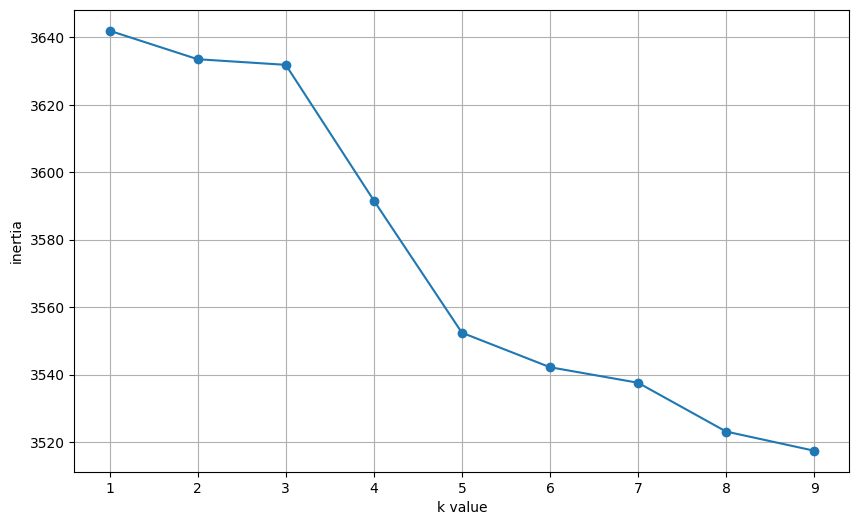

In [19]:
plt.figure(figsize=(10,6))
plt.plot(k, inertia, marker='o')
plt.xlabel('k value')
plt.ylabel('inertia')
plt.grid()
plt.show()

In [20]:
kn5 = KMeans(n_clusters=4, random_state=1).fit(tfidf_matrix)
kn5

KMeans(n_clusters=4, random_state=1)

In [21]:
kn5.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

hierarchical

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

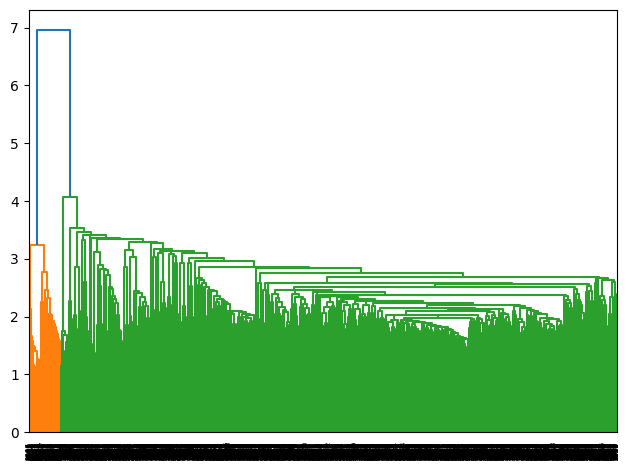

In [23]:
linkage_data = linkage(tfidf_matrix.toarray(), method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
labels = hierarchical_cluster.fit(tfidf_matrix.toarray())

pred_agc = pd.Series(hierarchical_cluster.labels_)
pred_agc

0       0
1       0
2       0
3       0
4       0
       ..
3657    0
3658    0
3659    0
3660    0
3661    0
Length: 3662, dtype: int64

In [25]:

from sklearn import metrics
labels = kn5.labels_
metrics.silhouette_score(tfidf_matrix, labels, metric='euclidean')

np.float64(0.004149727387729533)

In [26]:
from sklearn import metrics
labels = pred_agc
metrics.silhouette_score(tfidf_matrix, labels, metric='euclidean')

np.float64(-0.0025291773682741972)

In [27]:
print(len(data))
print(len(kn5.labels_))

3662
3662


In [28]:
df_Kmeans = data.copy()  # Create a copy of the original DataFrame
df_Kmeans['cluster'] = kn5.labels_  # Add the cluster labels as a new column
print(len(kn5.labels_))
print(len(df_Kmeans))

3662
3662


In [29]:
df_Kmeans = data.copy(True)
df_Kmeans['cluster'] = kn5.labels_
df_Kmeans

,title,title clean,tokenized_title,lemmatized_title,lemmatized_text,count_words,cluster
0,Who Was the Mysterious Hijacker D.B. Cooper?,mysterious hijacker db cooper,"[mysterious, hijacker, db, cooper]","[mysterious, hijacker, db, cooper]",mysterious hijacker db cooper,4,0
1,How Americans Started Clipping Coupons,americans started clipping coupons,"[americans, started, clipping, coupons]","[american, started, clipping, coupon]",american started clipping coupon,4,0
2,How the Great Cranberry Scare of 1959 Set Off ...,great cranberry scare set thanksgiving panic,"[great, cranberry, scare, set, thanksgiving, p...","[great, cranberry, scare, set, thanksgiving, p...",great cranberry scare set thanksgiving panic,6,0
3,How Ronald Reagan Tried to Shrink Government S...,ronald reagan tried shrink government spending,"[ronald, reagan, tried, shrink, government, sp...","[ronald, reagan, tried, shrink, government, sp...",ronald reagan tried shrink government spending,6,2
4,What Is Wampum—and How Was It Used?,wampum—and used,"[wampum—and, used]","[wampum—and, used]",wampum—and used,2,0
...,...,...,...,...,...,...,...
3657,The Mother Who Saved Suffrage: Passing the 19t...,mother saved suffrage passing th amendment,"[mother, saved, suffrage, passing, th, amendment]","[mother, saved, suffrage, passing, th, amendment]",mother saved suffrage passing th amendment,6,0
3658,Baseball’s First All‑Star Game,baseballs first all‑star game,"[baseballs, first, all‑star, game]","[baseball, first, all‑star, game]",baseball first all‑star game,4,0
3659,World Cup Fast Facts You Might Not Know,world cup fast facts might know,"[world, cup, fast, facts, might, know]","[world, cup, fast, fact, might, know]",world cup fast fact might know,6,0
3660,1950 World Cup: The Miracle on Green,world cup miracle green,"[world, cup, miracle, green]","[world, cup, miracle, green]",world cup miracle green,4,0


In [30]:
%pip install wordcloud
from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.


Kmeans for cluster 0


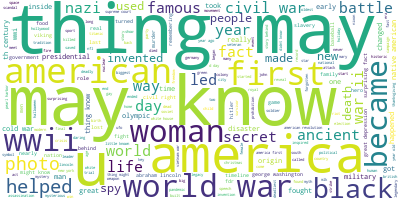

In [31]:
c=0

print('Kmeans for cluster '+str(c))
df_c = df_Kmeans[df_Kmeans['cluster'] == c]
long_string = ','.join(list(df_c['lemmatized_text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Kmeans for cluster 1


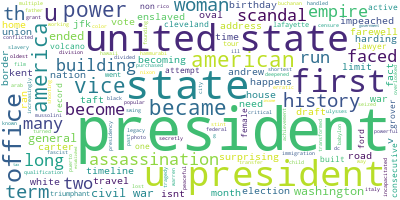

In [32]:
c=1

print('Kmeans for cluster '+str(c))
df_c = df_Kmeans[df_Kmeans['cluster'] == c]
long_string = ','.join(list(df_c['lemmatized_text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Kmeans for cluster 2


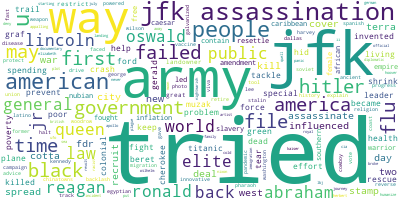

In [33]:
c=2

print('Kmeans for cluster '+str(c))
df_c = df_Kmeans[df_Kmeans['cluster'] == c]
long_string = ','.join(list(df_c['lemmatized_text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Kmeans for cluster 3


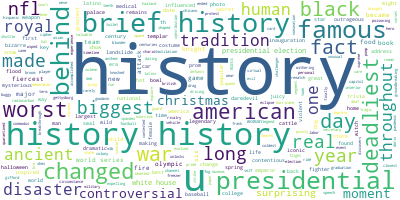

In [34]:
c=3

print('Kmeans for cluster '+str(c))
df_c = df_Kmeans[df_Kmeans['cluster'] == c]
long_string = ','.join(list(df_c['lemmatized_text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [35]:
feature_names = vectorizer.get_feature_names_out()

# Get the TF-IDF scores
tfidf_scores = tfidf_matrix.toarray()

for i, doc_scores in enumerate(tfidf_scores):
    print(f"Dokumen {i + 1}:")
    sorted_indices = doc_scores.argsort()[::-1]
    for index in sorted_indices[:3]:
        print(f"  - {feature_names[index]}: {doc_scores[index]:.4f}")

Dokumen 1:
  - hijacker: 0.5339
  - db: 0.5339
  - cooper: 0.5150
Dokumen 2:
  - coupon: 0.5969
  - clipping: 0.5969
  - started: 0.4605
Dokumen 3:
  - cranberry: 0.4812
  - scare: 0.4420
  - panic: 0.4420
Dokumen 4:
  - spending: 0.4801
  - shrink: 0.4801
  - ronald: 0.4284
Dokumen 5:
  - wampum: 0.7510
  - used: 0.4912
  - and: 0.4412
Dokumen 6:
  - song: 0.5759
  - classic: 0.5161
  - christmas: 0.4539
Dokumen 7:
  - sequoia: 0.4220
  - log: 0.4019
  - giant: 0.3876
Dokumen 8:
  - kennedy: 0.5678
  - john: 0.5048
  - assassination: 0.5048
Dokumen 9:
  - foodborne: 0.5358
  - illness: 0.4922
  - outbreak: 0.4781
Dokumen 10:
  - los: 0.3926
  - dam: 0.3926
  - angeles: 0.3926
Dokumen 11:
  - gettysburg: 0.4994
  - address: 0.4891
  - speech: 0.4254
Dokumen 12:
  - fluoride: 0.4769
  - adding: 0.4769
  - water: 0.4381
Dokumen 13:
  - rewrote: 0.4773
  - lucy: 0.4773
  - fossil: 0.4603
Dokumen 14:
  - recess: 0.5554
  - appointment: 0.5554
  - origin: 0.3810
Dokumen 15:
  - blitz: 0.575

In [36]:
from collections import Counter

num_clusters = len(df_Kmeans['cluster'].unique())
cluster_keywords = {i: [] for i in range(num_clusters)}

for i, label in enumerate(df_Kmeans['cluster']):
    cluster_keywords[label].extend(df_Kmeans['lemmatized_text'].iloc[i].split())

for cluster, words in cluster_keywords.items():
    word_freq = Counter(words)
    most_common_words = word_freq.most_common(3)
    print(f"Cluster {cluster}:")
    for word, freq in most_common_words:
        print(f"{word}: {freq}")
    print()


Cluster 0:
know: 280
thing: 267
war: 242

Cluster 1:
president: 73
state: 40
u: 23

Cluster 2:
tried: 38
jfk: 18
army: 11

Cluster 3:
history: 227
u: 25
presidential: 14



In [37]:
from sklearn.metrics.pairwise import cosine_similarity

def search_articles(keyword):
    """
    Cari semua artikel yang cocok dengan kata kunci berdasarkan kesamaan kosinus.
    Menampilkan semua judul artikel yang relevan.
    """
    lemmatized_keyword = lemmatizer.lemmatize(keyword.lower())
    
    # Transform keyword to vector
    keyword_vector = vectorizer.transform([lemmatized_keyword])
    
    # Calculate cosine similarity
    similarities = cosine_similarity(keyword_vector, tfidf_matrix)
    
    # Threshold for similarity (e.g., >0 untuk ambil semua yang relevan)
    relevant_indices = [i for i, similarity in enumerate(similarities[0]) if similarity > 0]
    
    print(f"Hasil pencarian untuk kata kunci '{keyword}':")
    
    if relevant_indices:
        for idx in relevant_indices:
            print(f"- {data_cleaned.iloc[idx]['title']}")
    else:
        print("Tidak ditemukan artikel yang cocok.")

In [38]:
search_articles('energy')

Hasil pencarian untuk kata kunci 'energy':
- How the 1970s US Energy Crisis Drove Innovation


Hasil Evaluasi Sistem Pencarian:
Precision: 0.67
Recall: 0.67
F1-Score: 0.67
MRR: 0.50
NDCG: 0.53
